# 합성곱 신경망의 시각화
## 가중치 시각화

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
model.layers

In [4]:
conv = model.layers[0]

In [5]:
conv_weights = conv.weights[0].numpy()

In [10]:
import numpy as np

In [16]:
conv_weights.mean(), conv_weights.std(), conv_weights.ndim

(-0.029797073, 0.2739086, 4)

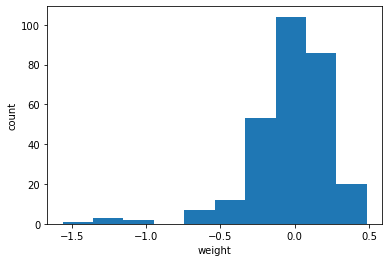

In [17]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1)) # hist 함수를 위해 1차원으로 reshape
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [18]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [19]:
no_training_conv = no_training_model.layers[0]

In [21]:
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [22]:
no_training_weights = no_training_conv.weights[0].numpy()

no_training_weights.mean(), no_training_weights.std(), no_training_weights.ndim
# 평균은 이전과 비슷하지만, 표준편차가 작아짐

(0.001967834, 0.08578049, 4)

Text(0, 0.5, 'cnt')

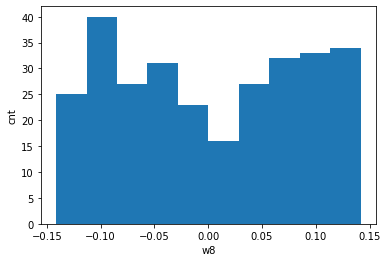

In [23]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('w8')
plt.ylabel('cnt')

# 대부분의 가중치가 -0.15 ~ 0.15 사이에 비교적 고른 분포를 보인다.
# 텐서플로가 신경망 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택했기 때문! 